1 - Basic Use of HDBSCAN

We gonna start with a dataset from sklearn

In [86]:
from sklearn.datasets import make_blobs
import pandas as pd
import hdbscan

In [87]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,3.169729,-6.107175,-0.352426,2.660534,-2.764192,5.840026,-7.890659,-4.975207,0.996109,-0.620278
1,7.901817,5.867023,2.441897,-0.248068,-7.082712,-6.376716,-2.930732,2.628036,-6.407093,-3.053803
2,2.672339,-2.693178,-2.093033,3.969338,-3.533842,3.681991,-7.488428,-3.799556,-3.337511,0.068517
3,-8.634055,-3.455445,1.500764,3.013209,7.463954,4.671205,-0.913900,-5.892805,6.612586,7.744534
4,7.674468,5.757511,2.487700,-1.773053,-9.361801,-8.628106,-4.983761,2.011269,-7.122726,-1.336207


Next step is do the simple clustering using the HDBSCAN. The first print is an array with the cluster number of each samples. The second print is the number maximum of clusters in the dataset (in this case there are 3 clusters (0 1 2)). The last print is the number of probabilities, 0 means the element is a noise and 1 means the element is in the center os group. 

In [88]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)
print(clusterer.labels_)
print(clusterer.labels_.max())
print(clusterer.probabilities_)

[1 0 1 ... 0 2 0]
2
[0.63993614 0.55139016 0.70489355 ... 0.7428665  0.92931549 0.68567333]


We can use a distance matrix to fit.

In [89]:
from sklearn.metrics.pairwise import pairwise_distances

In [90]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 0, 1, ..., 0, 2, 0], dtype=int64)

2 - Getting more information about a clustering

The image below is the dataset without clustering

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = np.load('clusterable_data.npy')
data, data.shape

(array([[-0.12153499, -0.22876337],
        [-0.22093687, -0.25251088],
        [ 0.1259037 , -0.27314321],
        ...,
        [ 0.50243143, -0.3002958 ],
        [ 0.53822256,  0.19412199],
        [-0.08688887, -0.2092721 ]]),
 (2309, 2))

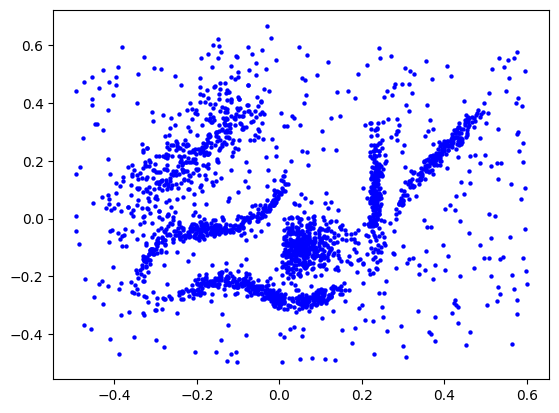

In [92]:
plt.scatter(*data.T, s=10, linewidth=0, c='b', alpha=1)

The image below is the dataset with clustering.

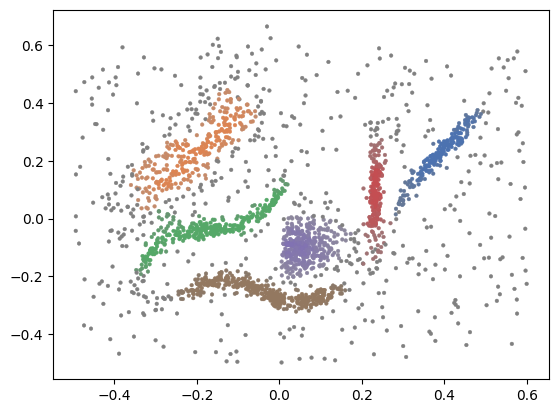

In [93]:
#doing the clustering with a min_number of 15 and fit
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=7, linewidth=0.3, c=cluster_member_colors, alpha=1)

The figure below is a condensed tree and show the hierarchy clustering and distribution os elements in each cluster. Also, show the clusters selected with an elipse.

<AxesSubplot: ylabel='$\\lambda$ value'>

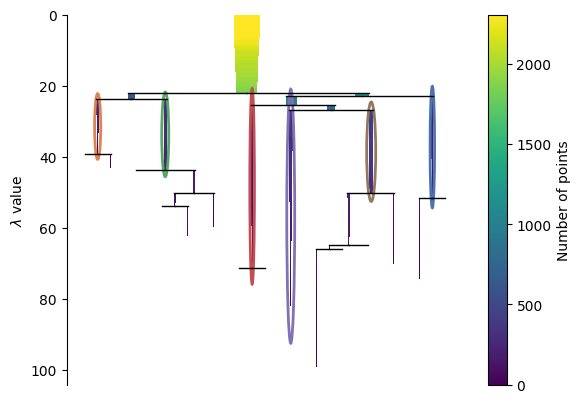

In [94]:
clusterer.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette('deep', 8))

array([ 0, -1,  0, ..., -1, -1,  0], dtype=int64)

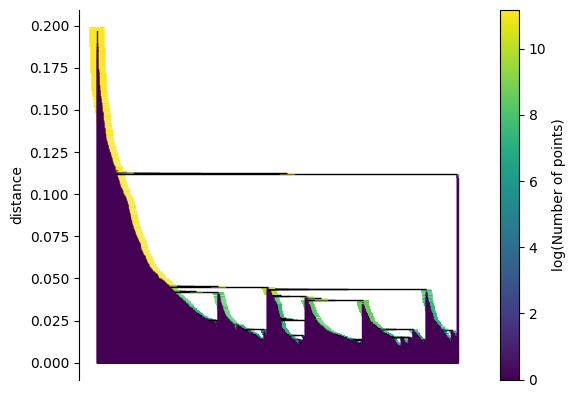

In [95]:
clusterer.single_linkage_tree_.plot(),
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)

3- Parameter Selection for HDBSCAN

There are a lot parameters in HDBSCAN, but only some are importants. 

3.1 - min_cluster_size

The min_cluster_size is the most important parameter in the HDBSCAN, because it's the minimum number of elements that become a cluster.

In [96]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits = load_digits()
data = digits.data
projection= TSNE().fit_transform(data)

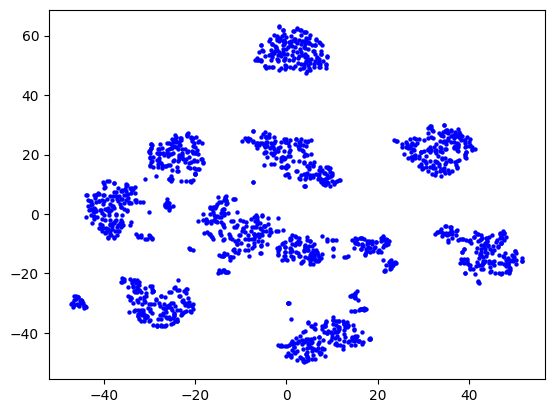

In [97]:
plt.scatter(*projection.T, s=10, linewidth=0, c='b', alpha=1)

10

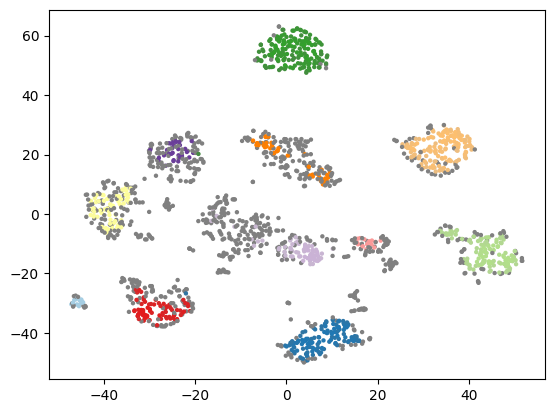

In [98]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

6

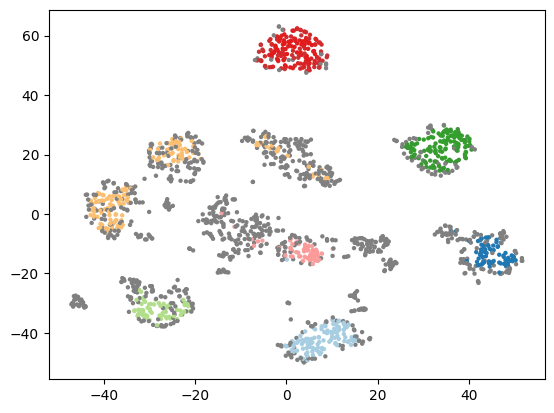

In [99]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

1

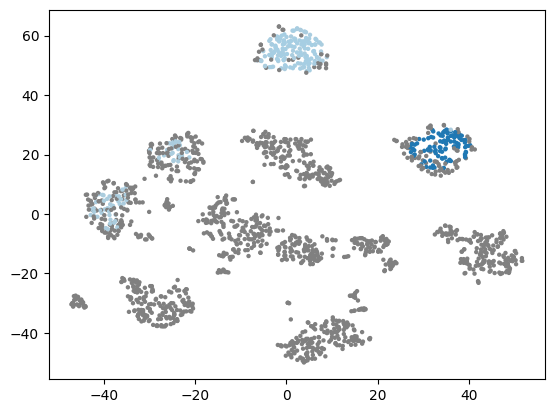

In [100]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

10

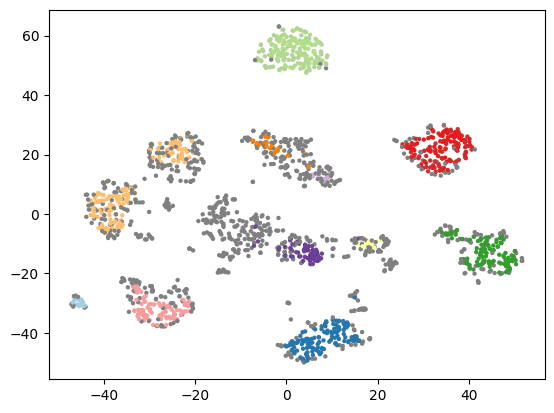

In [101]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=13).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.2 - min_samples

The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.

8

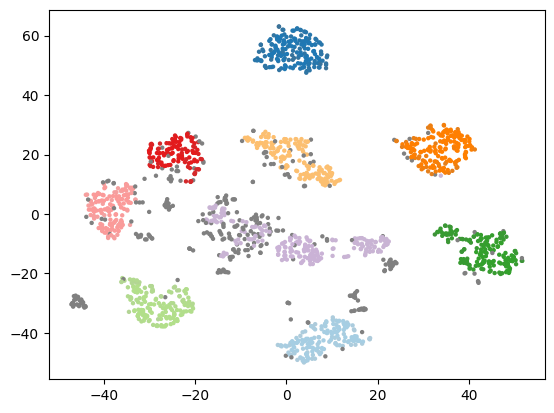

In [102]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.3 - cluster_selection_method

8

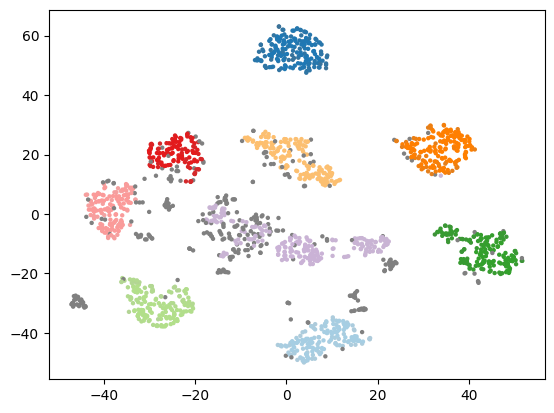

In [103]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1,cluster_selection_method='leaf').fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

3.4 - allow_single_cluster=True

8

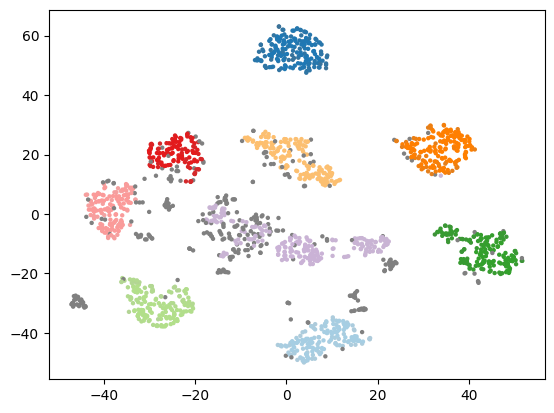

In [104]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=1,cluster_selection_method='leaf',allow_single_cluster=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T,s=10, linewidth=0,alpha=1,c=cluster_member_colors)
clusterer.labels_.max()

4 - Outliers

As we know the DBSCAN work very well in the detection of outliers. However, the K-Means does not.

In [134]:
data = np.load('clusterable_data.npy')
clusterer = hdbscan.HDBSCAN(min_cluster_size=45,min_samples=1 ).fit(data)
clusterer.outlier_scores_

array([0.10843883, 0.13004625, 0.04372601, ..., 0.51592521, 0.2583825 ,
       0.10149147])

C:\Users\brain\AppData\Local\Temp\ipykernel_3912\3693830524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)


<AxesSubplot: ylabel='Density'>

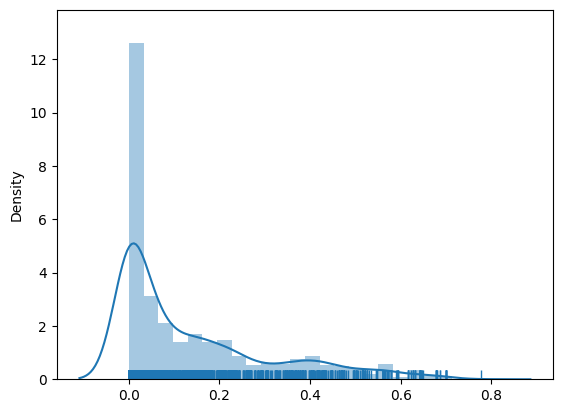

In [126]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

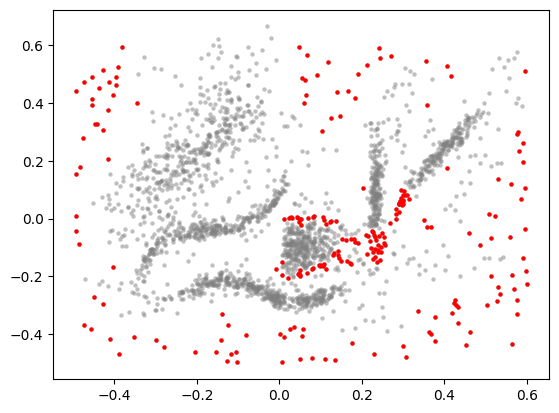

In [135]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
plt.scatter(*data.T, s=10, linewidth=0, c='gray', alpha=0.5)
plt.scatter(*data[outliers].T, s=10, linewidth=0, c='red', alpha=1)

Note that not only are the outlying border points highlighted as outliers, but points at the edge of the central ball like cluster, and just below the vertical band cluster, are also designated as outliers. This is because those two clusters are extremely dense, and the points at the edge of this cluster are close enough to the cluster that they should be part of it, but far enough from the being core parts of the cluster that they are extremely unlikely and hence anomalous.

4 - Predicting clusters for new points